In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
import seaborn as sns
import platform
from matplotlib import font_manager , rc

if platform.system() == 'Darwin':
  rc('font' , family = 'AppleGothic')
elif platform.system() == 'Windows':
  path = 'C:/Windows/Fonts/malgun.ttf'
  font_name = font_manager.FontProperties(fname = path).get_name()
  rc('font' , family = font_name)
else:
  print('모름')
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')

In [2]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [3]:
from sklearn.model_selection import train_test_split
train_input , test_input , train_target , test_target = train_test_split(perch_length , perch_weight , random_state = 42)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [4]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [5]:
lr.fit(train_input , train_target)

LinearRegression()

In [6]:
lr.predict([[50]])

array([1241.83860323])

In [7]:
print(lr.coef_ , lr.intercept_)

[39.01714496] -709.0186449535477


In [8]:
print(lr.score(train_input , train_target))
print(lr.score(test_input , test_target))

0.9398463339976041
0.8247503123313559


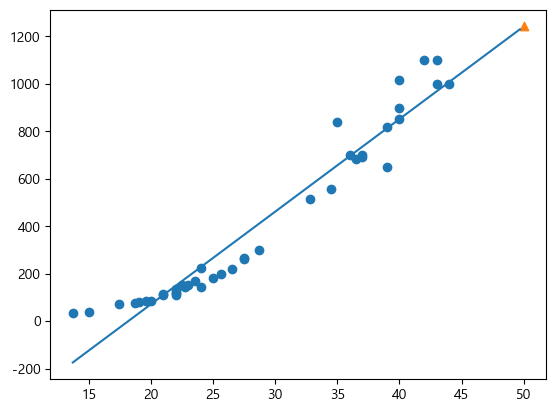

In [9]:
plt.scatter(train_input , train_target)
plt.scatter(50,lr.predict([[50]]) , marker = '^')
plt.plot(np.arange(train_input.min(),50) , np.arange(train_input.min(),50)*lr.coef_ + lr.intercept_)
plt.show()

- 2차방정식으로 표기

In [10]:
train_poly = np.column_stack([train_input**2 , train_input])

In [11]:
test_poly = np.column_stack([test_input**2 , test_input])

In [12]:
lr = LinearRegression()
lr.fit(train_poly , train_target)

LinearRegression()

In [13]:
lr.predict([[2500,50]])

array([1573.98423528])

In [14]:
lr.score(train_poly , train_target)

0.9706807451768623

In [15]:
lr.score(test_poly , test_target)

0.9775935108325121

In [16]:
print(lr.coef_ , lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


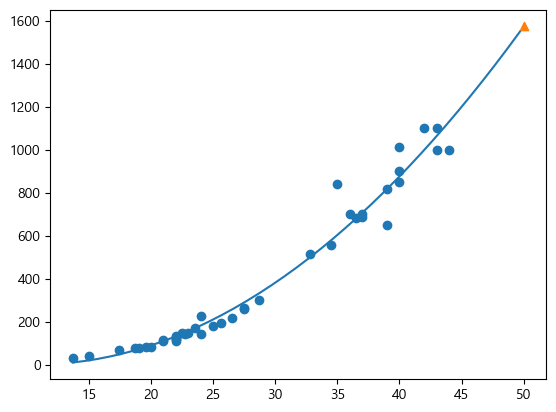

In [17]:
plt.scatter(train_input , train_target)
plt.scatter(50,lr.predict([[2500,50]]) , marker = '^')
plt.plot(np.arange(train_input.min(),50) , (np.arange(train_input.min(),50)**2)*lr.coef_[0] + np.arange(train_input.min(),50)*lr.coef_[1] + lr.intercept_)
plt.show()

# 특성공학
 - 기존의 특성을 사용해 새로운 특성을 뽑아내는 것
 - transform 메소드 사용

https://bit.ly/perch_csv

In [18]:
df = pd.read_csv('https://bit.ly/perch_csv')

In [19]:
raw = df.to_numpy()

- 생선의 길이 , 높이 , 두께

In [20]:
weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0, 1000.0])

In [21]:
len(raw)

56

In [22]:
len(weight)

56

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
train_input , test_input , train_target , test_target = train_test_split(raw , weight , random_state = 42)

In [25]:
from sklearn.preprocessing import PolynomialFeatures as PF

In [26]:
poly = PF()
poly.fit_transform([[2,3]])

array([[1., 2., 3., 4., 6., 9.]])

### 1 제거

In [27]:
poly = PF(include_bias = False)
poly.fit_transform([[2,3]])

array([[2., 3., 4., 6., 9.]])

In [28]:
train_input.shape

(42, 3)

In [29]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias = False)
train_poly = poly.fit_transform(train_input)
test_poly = poly.transform(test_input)

In [30]:
train_poly.shape

(42, 9)

### 특성공학의 과정을 확인할 수 있음

In [31]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [32]:
test_poly = poly.transform(test_input)

In [33]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [34]:
lr.fit(train_poly , train_target)

LinearRegression()

In [35]:
lr.score(train_poly , train_target)

0.9903183436982126

In [36]:
lr.score(test_poly , test_target)

0.9714559911594143

- 훈련데이터의 평가점수가 테스트데이터보다 높다 , 즉 과대적합이 발생되었음을 알 수 있다.

### 특성의 개수를 증가시키기(degree)

In [37]:
poly = PolynomialFeatures(include_bias = False , degree = 5)
train_poly = poly.fit_transform(train_input)
test_poly = poly.transform(test_input)

In [38]:
train_poly.shape

(42, 55)

In [39]:
lr.fit(train_poly , train_target)
print(lr.score(train_poly , train_target))
print(lr.score(test_poly , test_target))

0.999999999998714
-144.4066764700865


- 특성의 개수가 늘어나면 선형회귀모델은 강력해진다.
- 너무 많아지면 과대적합이 발생.
- 규제 : 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 제한

- 선형회귀의 과대적합을 해결하는 방법
 - 특성(feature)의 개수 줄이기
 - 정규화 수행(Z-Value 등)

- 선형회귀 모형의 규제를 제약하는 모델
 - 릿지 회귀 모델 : 개수를 제곱한 값을 기준으로 규제를 적용
 - 라소 회귀 모델 : 개수의 절대값을 기준으로 규제 적용
 - 두 알고리즘 모두 개수의 크기를 줄이지만 라쏘는 아예 0으로 만들 수도 있어서 일반적으로 릿지를 선호
 - alpha : 릿지와 라쏘 모델을 사용할 때 규제의 양을 임의로 조절하는 하이퍼파라미터
 - alpha 값이 크면 규제 강도가 강해진다

In [40]:
# 평균과 표준편차를 이용하여 특성의 스케일을 표준점수로 변경
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

- 릿지회귀

In [41]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled , train_target)
print(ridge.score(train_scaled , train_target))
print(ridge.score(test_scaled , test_target))

0.9896101671037343
0.9790693977615391


In [42]:
train_score = []
test_score = []
for i in [0.001 , 0.01 , 0.1 , 1 , 10 , 100]:
    ridge = Ridge(alpha = i)
    ridge.fit(train_scaled , train_target)
    train_score.append(ridge.score(train_scaled , train_target))
    test_score.append(ridge.score(test_scaled , test_target))

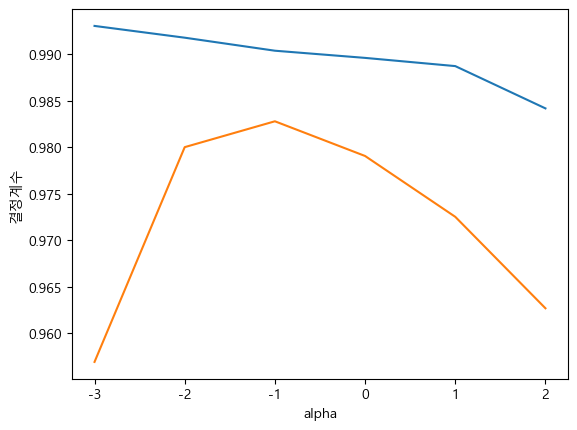

In [43]:
plt.plot(np.log10([0.001 , 0.01 , 0.1 , 1 , 10 , 100]) , train_score)
plt.plot(np.log10([0.001 , 0.01 , 0.1 , 1, 10 , 100]) , test_score)
plt.xlabel('alpha')
plt.ylabel('결정계수')
plt.show()

In [44]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled , train_target)
print(ridge.score(train_scaled , train_target))
print(ridge.score(test_scaled , test_target))

0.9903815817570366
0.9827976465386989


In [45]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled , train_target)
print(lasso.score(train_scaled , train_target))
print(lasso.score(test_scaled , test_target))

0.989789897208096
0.9800593698421886


In [46]:
train_score = []
test_score = []
for i in [0.001 , 0.01 , 0.1 , 1 , 10 , 100]:
    lasso = Lasso(alpha = i)
    lasso.fit(train_scaled , train_target)
    train_score.append(lasso.score(train_scaled , train_target))
    test_score.append(lasso.score(test_scaled , test_target))

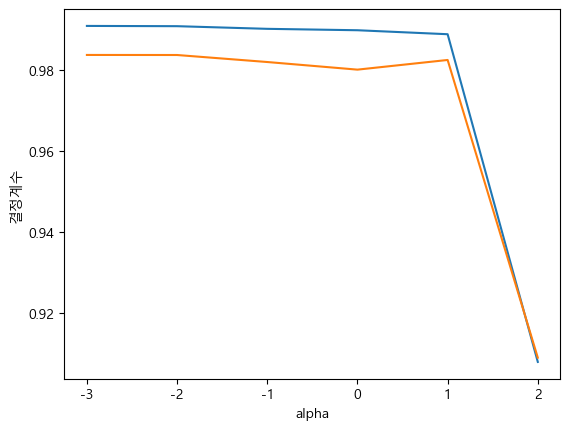

In [47]:
plt.plot(np.log10([0.001 , 0.01 , 0.1 , 1 , 10 , 100]) , train_score)
plt.plot(np.log10([0.001 , 0.01 , 0.1 , 1, 10 , 100]) , test_score)
plt.xlabel('alpha')
plt.ylabel('결정계수')
plt.show()

In [48]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled , train_target)
print(lasso.score(train_scaled , train_target))
print(lasso.score(test_scaled , test_target))

0.9888067471131867
0.9824470598706695
